In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import load_boston
import seaborn as sns

In [3]:
boston = load_boston()

In [17]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
bos=pd.DataFrame(boston.data, columns = boston.feature_names)

In [9]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
len(bos)

506

In [12]:
bos['price']=boston.target

In [13]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [18]:
y = bos.price
X = bos.drop('price',axis=1)

In [19]:
Xc = sm.add_constant(X)

In [20]:
lin_reg=sm.OLS(y,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        16:39:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [ ]:
#R Squared = 0.741, says that 74% of the variations explained by the ind. variables.
#F value is significant, reject H0. Therefore model is good!!

In [ ]:
# Drop variables age & Indus as it shows there is no significanes and coeff is 0.

In [21]:
X = bos.drop(['price','INDUS','AGE'],axis=1)

In [24]:
Xc = sm.add_constant(X)
lin_reg=sm.OLS(y,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          5.54e-137
Time:                        16:46:16   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

## Assumption 1 - Normality of residuals

In [26]:
residuals = result.resid #it shows the residuals/errors

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


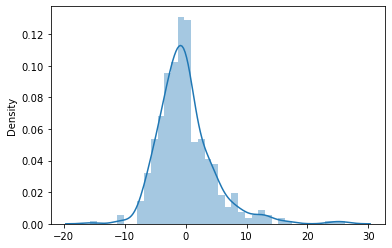

In [30]:
sns.distplot(residuals)
plt.show()

In [31]:
residuals.mean()

-5.072797693544194e-15

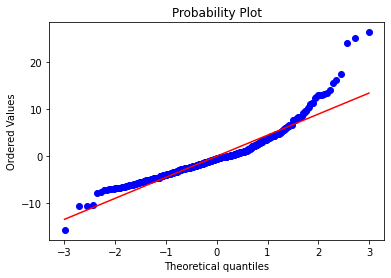

In [35]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt) #plot QQ
plt.show()

qq pplot shows that residuals are close to normality around the mean. It deviates from normality at the extreme values.

### Jarque Berra test - Test for Normality

In [37]:
print(stats.jarque_bera(residuals))

Jarque_beraResult(statistic=787.7851418746452, pvalue=0.0)


In [38]:
#if pvalue is less than alpha(0.05) then it concludes that data is not normal!!

## Transformation

In [40]:
lny=np.log(y)#log transform 'y'
lin_reg=sm.OLS(lny,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          4.31e-159
Time:                        18:27:20   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0837      0.203     20.112      0.0

In [41]:
#Test for normality of residuals after Transformation

residualT = result.resid

In [42]:
print(stats.jarque_bera(residualT))

Jarque_beraResult(statistic=227.36073522664645, pvalue=0.0)


C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


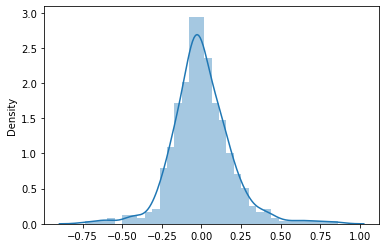

In [45]:
sns.distplot(residualT)
plt.show()

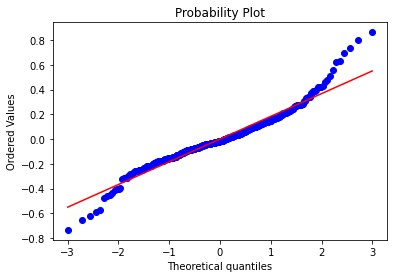

In [44]:
stats.probplot(residualT,plot=plt) #plot QQ
plt.show()

In [47]:
df=bos.copy()
df_t = df.transform(lambda x : np.log(x))

C:\Users\prasa\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
df_t.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,-5.064036,2.890372,0.837248,-inf,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,-inf,1.955860,-inf,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,-inf,1.955860,-inf,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,-inf,0.779325,-inf,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,-inf,0.779325,-inf,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059


In [50]:
df_sqrt = df.transform(lambda x : x**(0.5))

In [51]:
df_sqrt.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.079498,4.242641,1.519868,0.0,0.733485,2.564176,8.074652,2.022375,1.000000,17.204651,3.911521,19.922349,2.231591,4.898979
1,0.165257,0.000000,2.658947,0.0,0.684836,2.533969,8.882567,2.228699,1.414214,15.556349,4.219005,19.922349,3.023243,4.647580
2,0.165197,0.000000,2.658947,0.0,0.684836,2.680485,7.816649,2.228699,1.414214,15.556349,4.219005,19.819939,2.007486,5.890671
3,0.179917,0.000000,1.476482,0.0,0.676757,2.645373,6.767570,2.462154,1.732051,14.899664,4.324350,19.865296,1.714643,5.779273
4,0.262774,0.000000,1.476482,0.0,0.676757,2.673387,7.362065,2.462154,1.732051,14.899664,4.324350,19.922349,2.308679,6.016644


In [54]:
y = df_sqrt.price
X = df_sqrt.drop(['price','ZN','INDUS','AGE'],axis=1)

In [55]:
Xc = sm.add_constant(X)
lin_reg=sm.OLS(y,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          1.01e-164
Time:                        18:50:45   Log-Likelihood:                -279.73
No. Observations:                 506   AIC:                             581.5
Df Residuals:                     495   BIC:                             628.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2488      0.899     11.399      0.0

In [56]:
res = result.resid

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

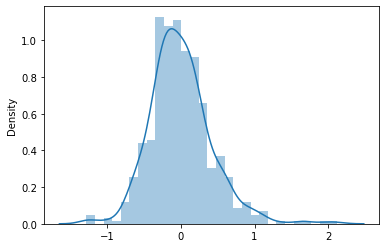

In [57]:
sns.distplot(res)

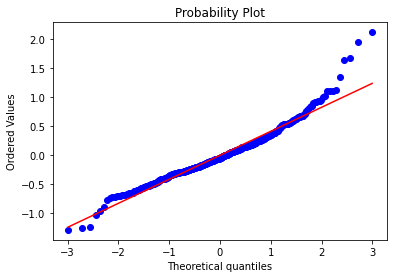

In [58]:
stats.probplot(res,plot=plt) #plot QQ
plt.show()

## Assumption 2 - Multicollinearity

In [59]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


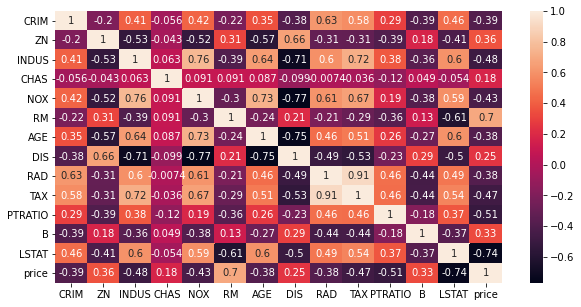

In [70]:
#bos.corr()
plt.figure(figsize=(10,5))
sns.heatmap(bos.corr(),annot=True)
plt.show()

In [139]:
y = bos.price
X = bos.drop(['price','AGE','INDUS','TAX','RAD','ZN','LSTAT','NOX','RM'],axis=1)

### calculating VIF

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

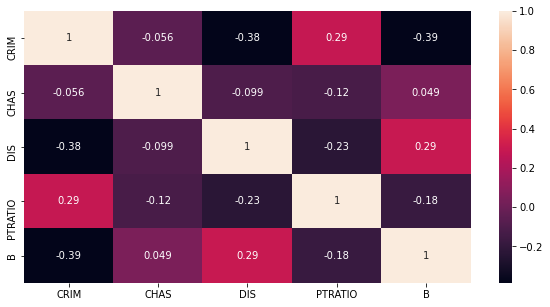

In [142]:
plt.figure(figsize=(10,5))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [143]:
pd.DataFrame({'VIF':vif}, index = X.columns)

,VIF
CRIM,1.583786
CHAS,1.093197
DIS,4.963302
PTRATIO,16.781444
B,16.234455


here having NOX, RM, PTRATIO, TAX as dependent variable, all have got strong connection with the other independent variable.

In [144]:
Xc = sm.add_constant(X)
lin_reg=sm.OLS(y,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     56.96
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           7.47e-47
Time:                        20:12:27   Log-Likelihood:                -1726.2
No. Observations:                 506   AIC:                             3464.
Df Residuals:                     500   BIC:                             3490.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.2338      3.492     13.525      0.0

In [ ]:
#PTratio vif is so high, we'll try to drop the features associated to PTratio.
# drop tax, RAD,ZN.
#Drop LSTAT for RM as it is high.
#drop NOX
#Drop RM

## 3. Homoscedasticity -  Constant variance of residuals

In [145]:
y = bos.price
X = bos.drop('price',axis=1)

In [146]:
Xc = sm.add_constant(X)
lin_reg=sm.OLS(y,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        20:23:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [148]:
residuals = result.resid
y_pred = result.predict(Xc)

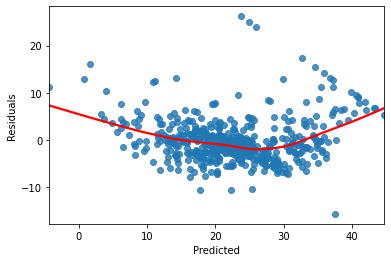

In [152]:
sns.regplot(x=y_pred,y=residuals,lowess = True, line_kws={'color':'red'}) #predicted vs residuals
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

Since there is confusion in telling whether is constant or not. We'll use Goldfeld test!!

In [156]:
import statsmodels.stats.api as sms 
name=['F Statistic','P value']
test = sms.het_goldfeldquandt(result.resid, Xc)

In [157]:
test

(2.431147325349745, 7.302071915608971e-12, 'increasing')

in the above, pvalue is less than 0.05. So reject null hypothesis and conclude there is no constant variance.

## 4. Autocorrelation

<ipython-input-159-d8f9a1e7ab36>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


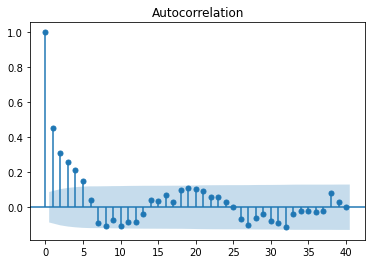

In [159]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residuals,lags=40)
acf.show()

The ACF chart shows moderate correlation with errors of lag 1. This indicate mild correlation. Also supported by DW statistics of 1.078

## 5. Linearity of relationship

In [160]:
Xc = sm.add_constant(X)
lin_reg=sm.OLS(y,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        11:03:02   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [161]:
y_pred = result.predict(Xc)

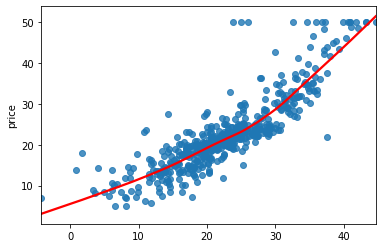

In [165]:
sns.regplot(x=y_pred,y=y,lowess =True, line_kws={'color':'red'})
plt.show()